# DAT402 Project 2
### Using Machine Learning to Predict Heart Disease
#### By: Philip Krause and Dylan Urias

We are using the dataset called "Heart Disease".  This dataset can be found on Kaggle.  (https://www.kaggle.com/datasets/oktayrdeki/heart-disease).  The data contains twenty different variables that potentially affect the risk of developing heart disease.  There are 10,000 observations and these are the twenty-one columns:

1. Age (Numerical)
2. Gender (Categorical)
3. Blood Pressure (Numerical)
4. Cholesterol Level (Numerical)
5. Exercise Habits (Categorical)
6. Smoking (Binary)
7. Family Heart Disease (Binary)
8. Diabetes (Binary)
9. BMI (Numerical)
10. High Blood Pressure (Binary)
11. Low HDL Cholesterol (Binary)
12. High HDL Cholesterol (Binary)
13. Alcohol Consumption (Categorical)
14. Stress Level (Categorical)
15. Sleep Hours (Numerical)
16. Sugar Consumption (Categorical)
17. Triglyceride Level (Numerical)
18. Fasting Blood Sugar (Numerical)
19. CRP Level (Numerical)
20. Homocysteine Level (Numerical)
21. Heart Disease (Binary)
<br>
<br>
Our goal in this project is to use these 21 variables to accurately predict the existance of heart disease in a subject. We will use both supervised and unsupervised methods to best understand and analyze the data.

In [15]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Cleaning Data

In [9]:
# Reading csv file
df = pd.read_csv('heart_disease.csv')
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [10]:
# Looking for null values
print(df.shape)
df.isnull().sum(axis=0)

(10000, 21)


Age                     29
Gender                  19
Blood Pressure          19
Cholesterol Level       30
Exercise Habits         25
Smoking                 25
Family Heart Disease    21
Diabetes                30
BMI                     22
High Blood Pressure     26
Low HDL Cholesterol     25
High LDL Cholesterol    26
Alcohol Consumption     32
Stress Level            22
Sleep Hours             25
Sugar Consumption       30
Triglyceride Level      26
Fasting Blood Sugar     22
CRP Level               26
Homocysteine Level      20
Heart Disease Status     0
dtype: int64

In [11]:
#Dropping null values
df = df.dropna()
df.shape

(9500, 21)

## Exploratory Analysis

Text(0.5, 1.0, 'Heart Disease Status')

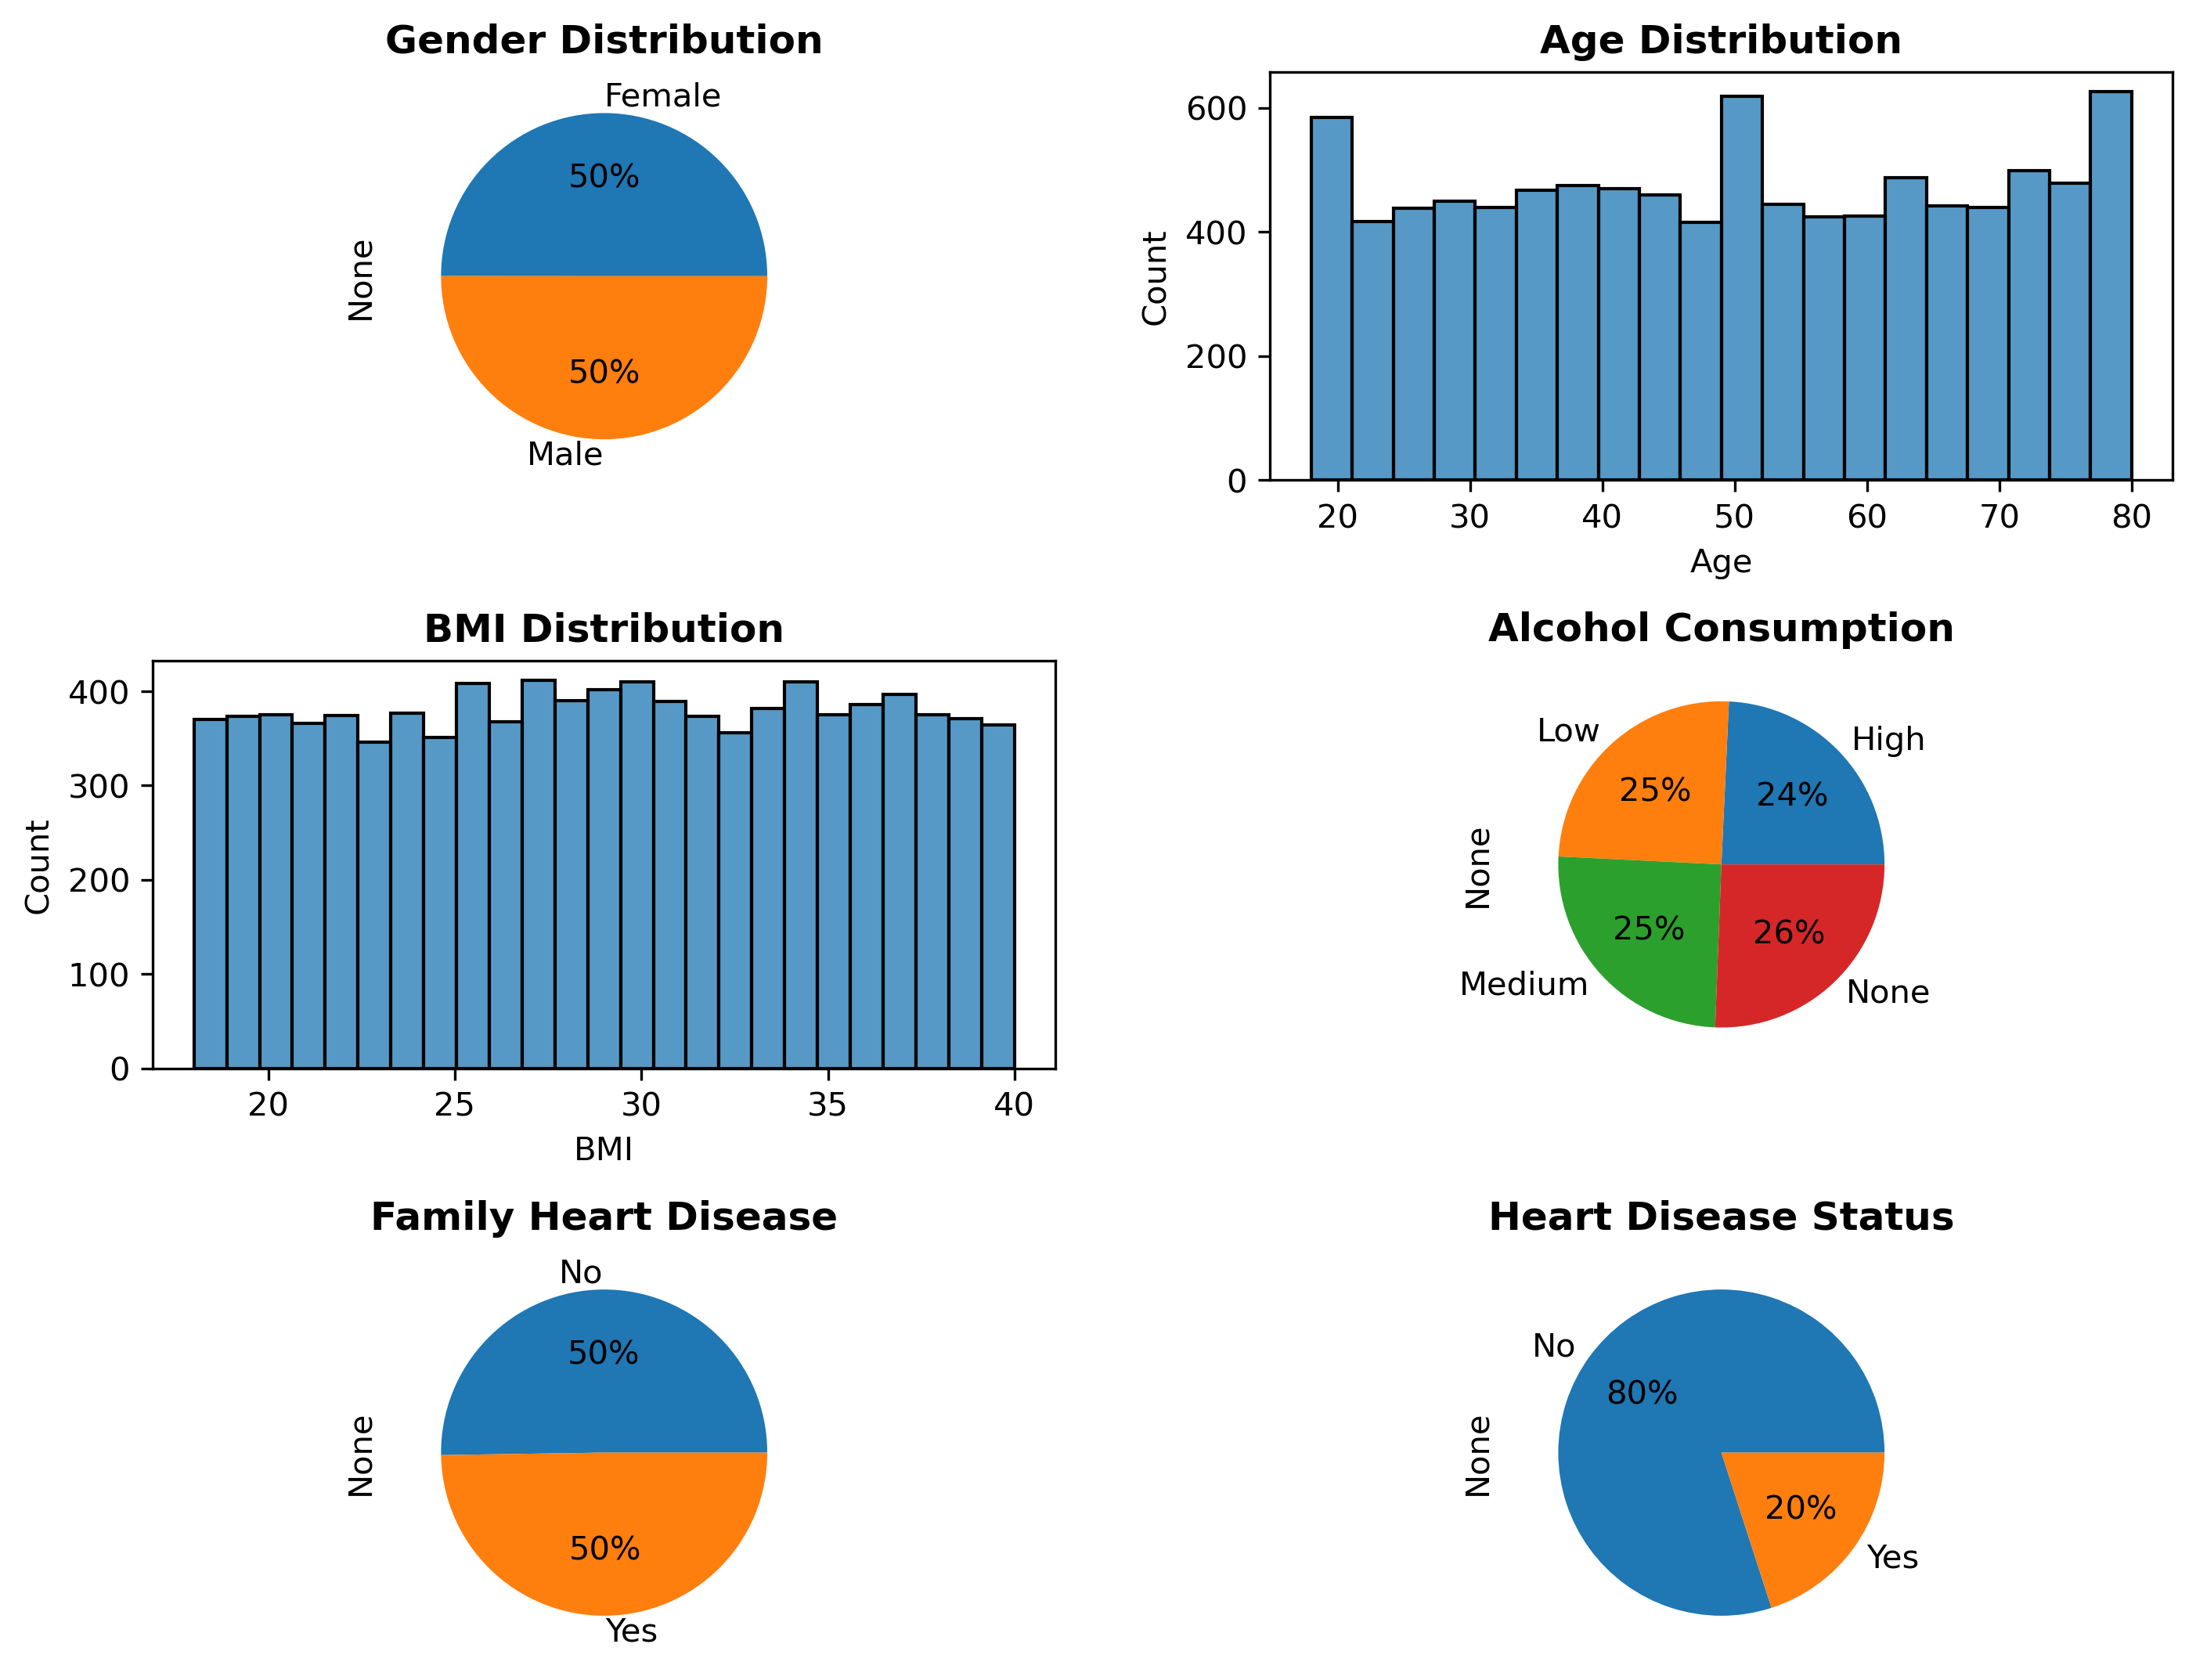

In [12]:
fig, ax1 = plt.subplots(3,2, dpi = 300, figsize=(10, 8))
fig.tight_layout(pad = 3.5)

#Gender pie chart
df.groupby('Gender').size().plot(ax = ax1[0][0],kind='pie', autopct='%1.0f%%')
ax1[0][0].set_title('Gender Distribution', fontweight='bold')

#Age Histogram
sns.histplot(ax = ax1[0][1], data = df, x = 'Age', bins = 20)
ax1[0][1].set_title('Age Distribution', fontweight='bold')

#BMI Histogram
sns.histplot(ax = ax1[1][0], data = df, x = 'BMI', bins = 25)
ax1[1][0].set_title('BMI Distribution', fontweight='bold')

#Alcohol Pie
df.groupby('Alcohol Consumption').size().plot(ax = ax1[1][1],kind='pie', autopct='%1.0f%%')
ax1[1][1].set_title('Alcohol Consumption', fontweight='bold')

#Family Pie
df.groupby('Family Heart Disease').size().plot(ax = ax1[2][0],kind='pie', autopct='%1.0f%%')
ax1[2][0].set_title('Family Heart Disease', fontweight='bold')

#Disease Status Pie
df.groupby('Heart Disease Status').size().plot(ax = ax1[2][1],kind='pie', autopct='%1.0f%%')#, labels = ['No', 'Yes'])
ax1[2][1].set_title('Heart Disease Status', fontweight='bold')

From this basic exploratory analysis of the data, we can see that for some of the most important variables, there is a very even distribution of subjects. Gender and family history are both split 50-50 while the age and BMI distributions are even across their respective ranges. Alcohol consumption is also split evenly between the four categories. Finally, the variable that we want to predict is pretty heavily skewed, with 80% of subjects not having heart disease.

In [13]:
# Encoding catgorical columns 
columns_list = df.select_dtypes(include=['object']).columns

for col in columns_list:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
1,69.0,0,146.0,286.0,0,0,1,1,25.221799,0,...,0,2,0,8.744034,2,133.0,157.0,9.355389,19.298875,0
2,46.0,1,126.0,216.0,1,0,0,0,29.855447,0,...,1,1,1,4.440440,1,393.0,92.0,12.709873,11.230926,0
3,32.0,0,122.0,293.0,0,1,1,0,24.130477,1,...,1,1,0,5.249405,0,293.0,94.0,12.509046,5.961958,0
4,60.0,1,166.0,242.0,1,1,1,1,20.486289,1,...,0,1,0,7.030971,0,263.0,154.0,10.381259,8.153887,0
5,25.0,1,152.0,257.0,1,1,0,0,28.144681,0,...,0,1,2,5.504876,1,126.0,91.0,4.297575,10.815983,0


Before creating the models, it is important for us to encode categorical columns so that they work with the models. 

## Unsupervised Learning with Principle Components Analysis (PCA)

We now use Principle components analysis to look at how the variables are related and reduce the amount of determining factors for heart disease while maintaining as much variance as possible.

In [16]:
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status'] 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
corr_matrix = X.corr()

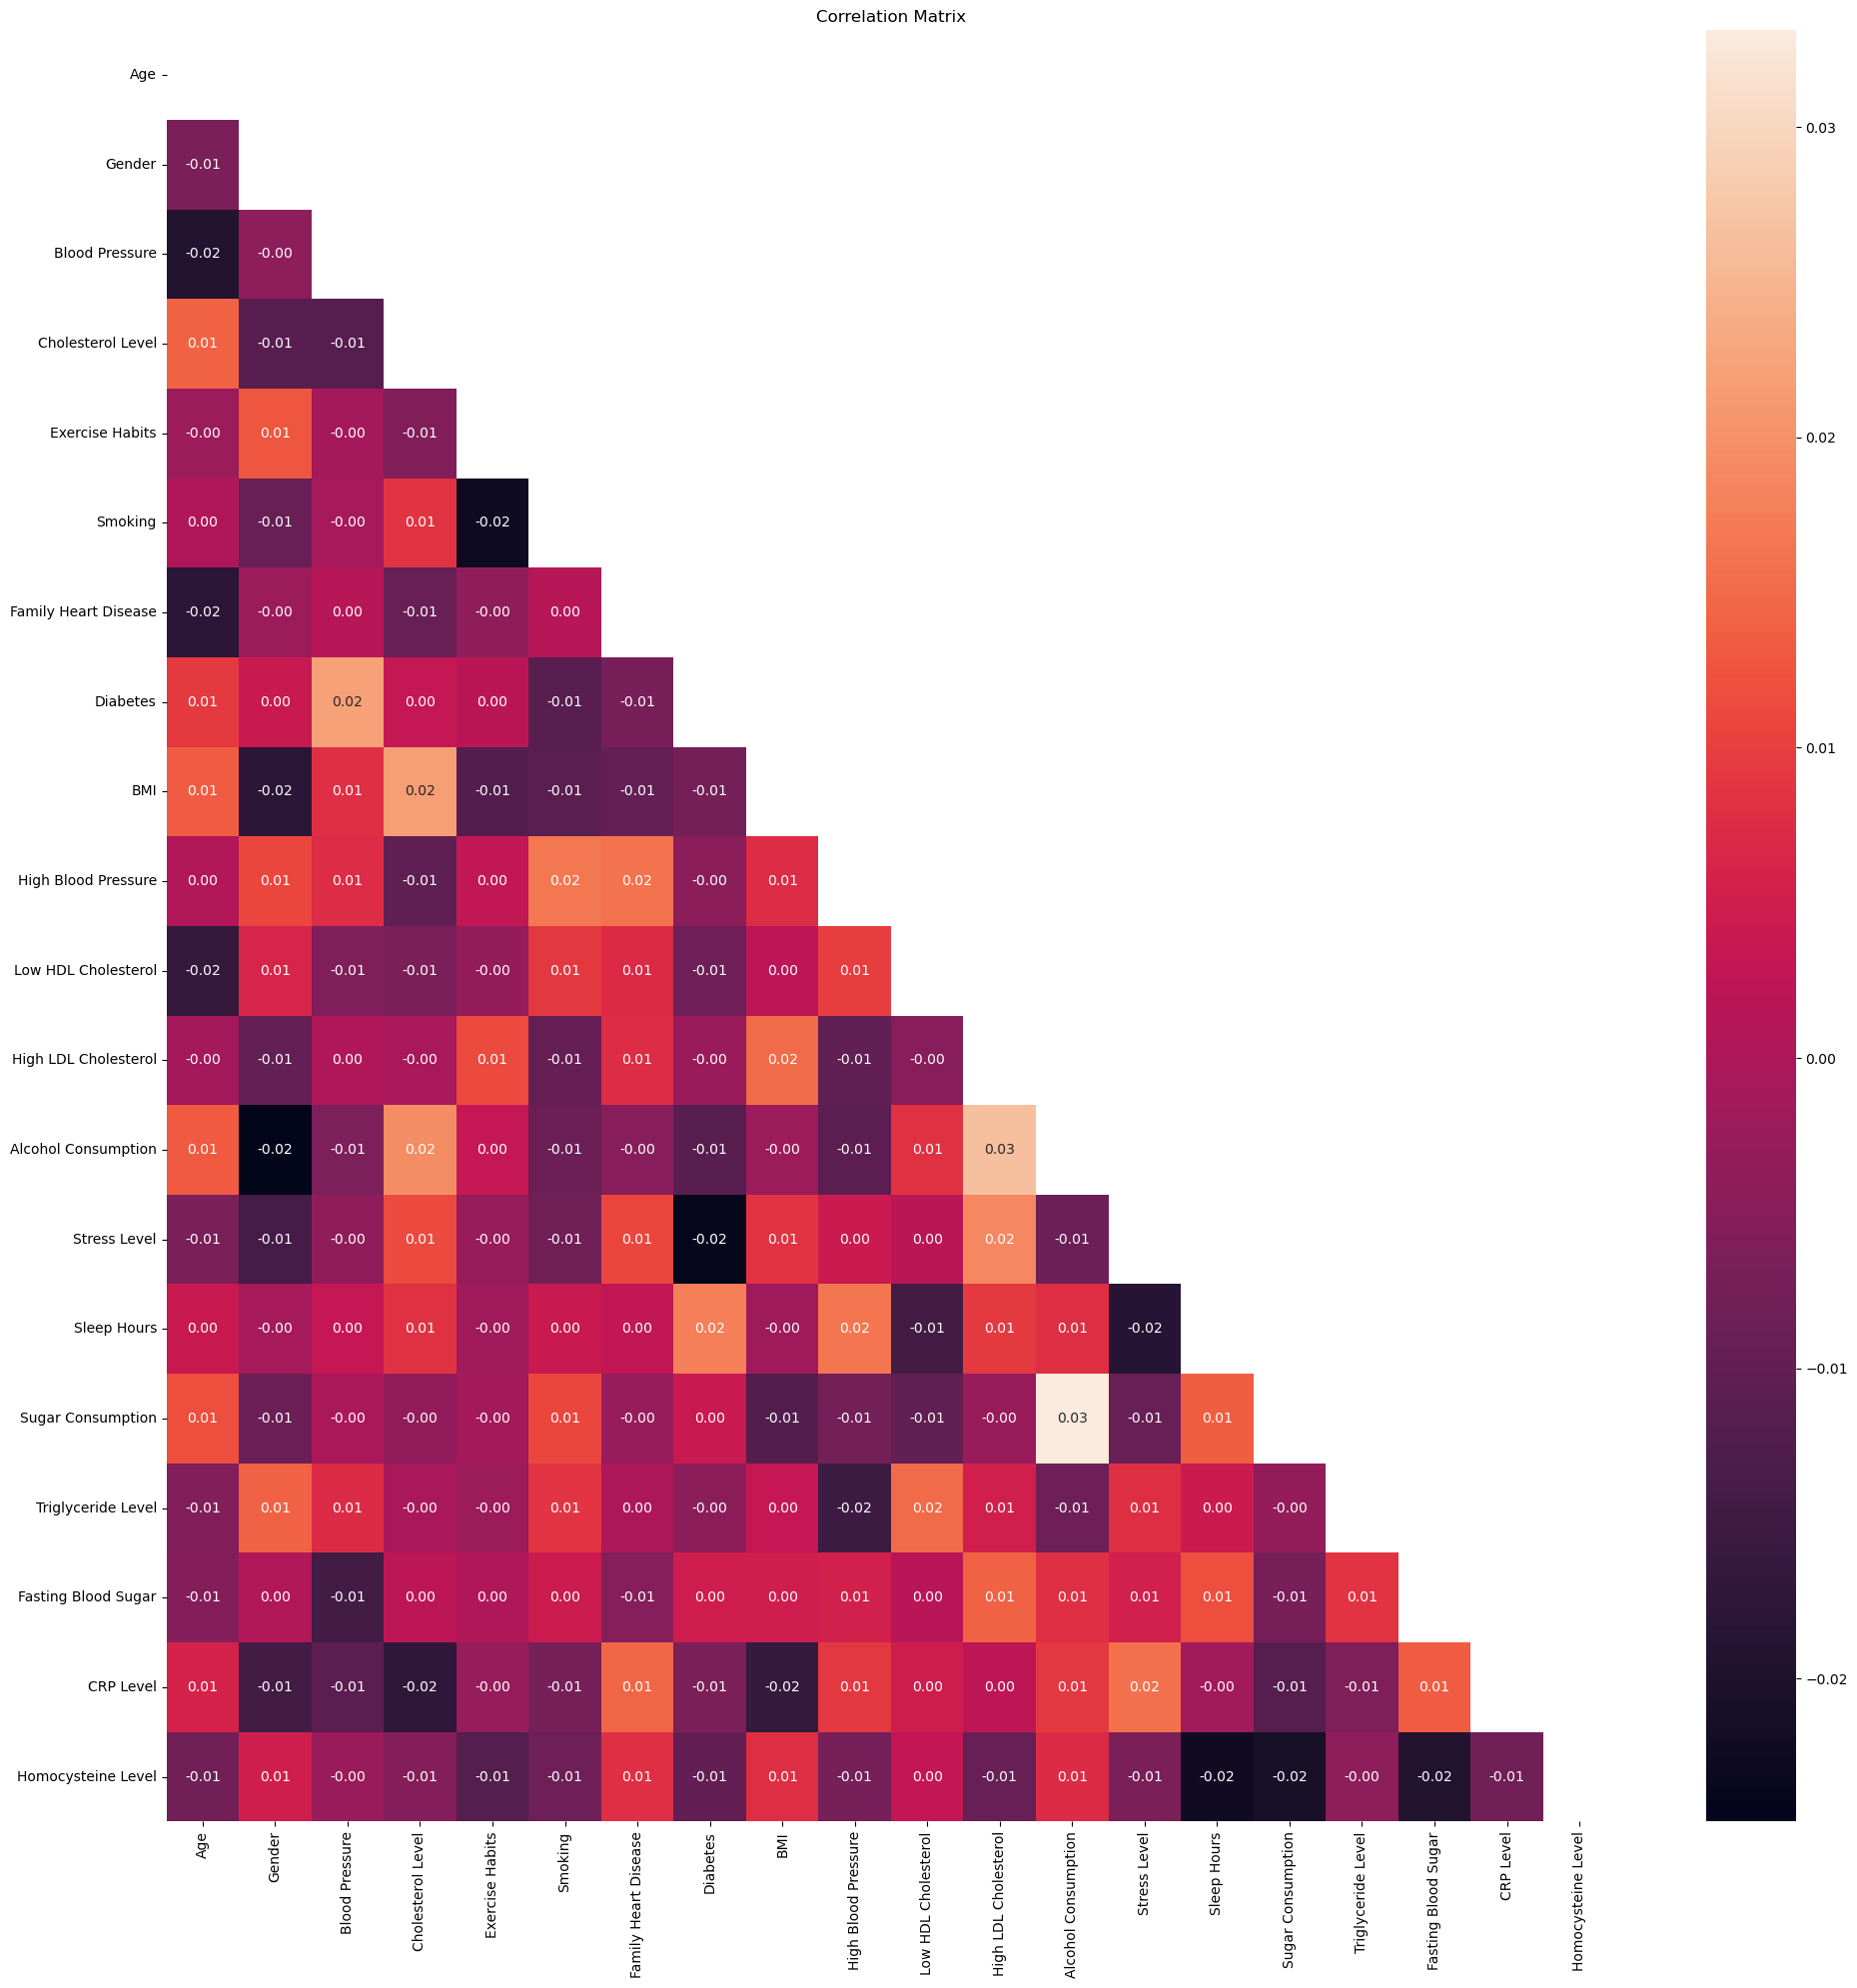

In [17]:
plt.figure(figsize = (20,20))

# Plotting heat map
matrix = np.triu(corr_matrix)
sns.heatmap(corr_matrix,mask = matrix, annot = True, fmt = '.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [18]:
# Maintain 90% of the variance while still reducing the dimensionality
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Printing the loadings for each component
print("\nRotation Matrix (Loadings):")
loadings = pd.DataFrame(
    pca.components_.T,
    index = X.columns,
    columns = [f'PC{i+1}' for i in range(pca.n_components_)]
)
print(loadings)


Rotation Matrix (Loadings):
                           PC1       PC2       PC3       PC4       PC5  \
Age                   0.352917 -0.051940 -0.115761 -0.069757 -0.096642   
Gender               -0.310478 -0.279549  0.019710  0.141145  0.090563   
Blood Pressure       -0.104394 -0.218302 -0.041261  0.039132  0.266009   
Cholesterol Level     0.324150  0.114685 -0.248066 -0.207478  0.206931   
Exercise Habits      -0.003925 -0.089387  0.137458  0.497930  0.031750   
Smoking              -0.008541 -0.052602  0.115383 -0.630347 -0.064394   
Family Heart Disease -0.217795  0.165224  0.270293 -0.037559 -0.100125   
Diabetes              0.103307 -0.428408  0.024141  0.139892  0.202364   
BMI                   0.144888  0.220114 -0.310289 -0.123871  0.434906   
High Blood Pressure  -0.162822 -0.043233  0.321956 -0.290655  0.085715   
Low HDL Cholesterol  -0.224999  0.180802  0.068650 -0.162995 -0.036204   
High LDL Cholesterol  0.229661  0.275969  0.160702  0.301286  0.257053   
Alcohol C

We will now plot biplots to examine how much the independent variables load onto each factor.  This will allow us to visualize how similar the independent variables are.

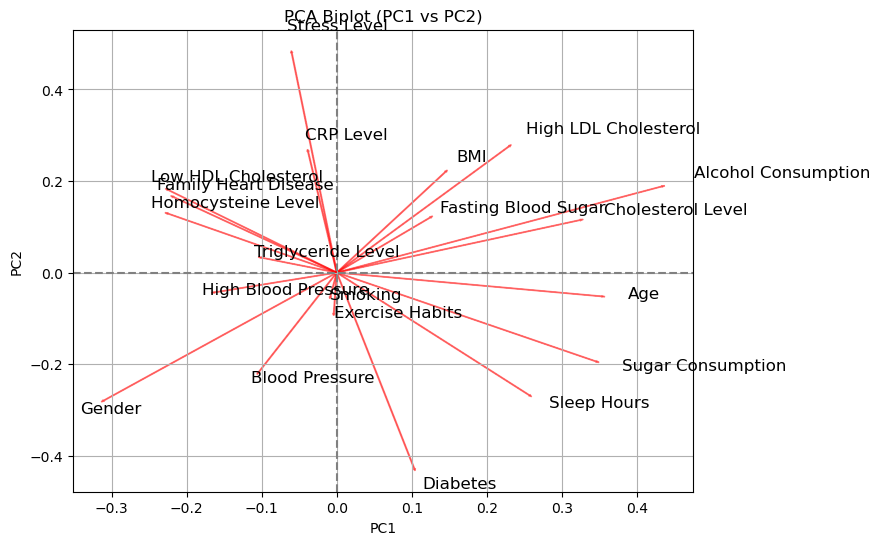

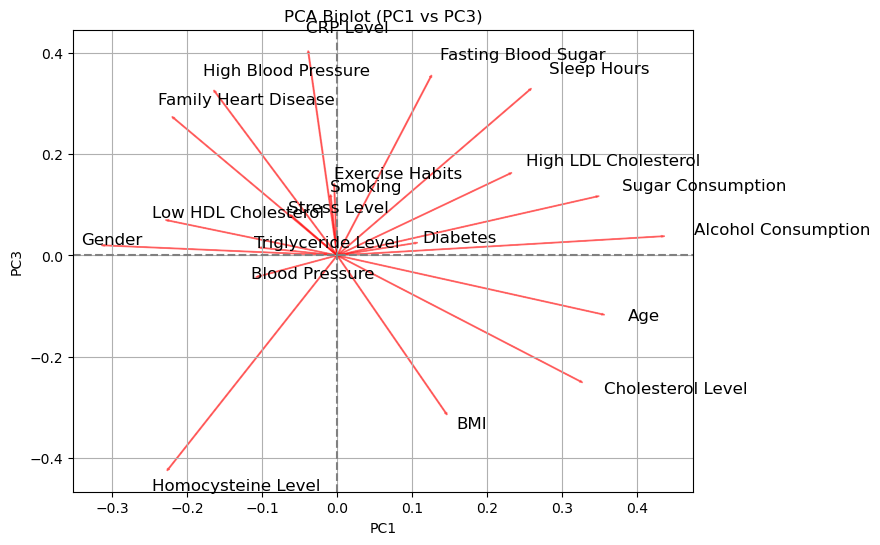

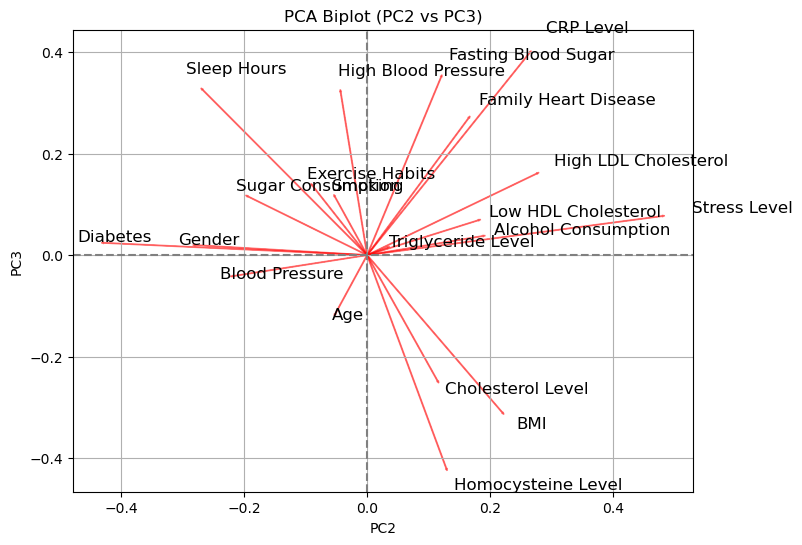

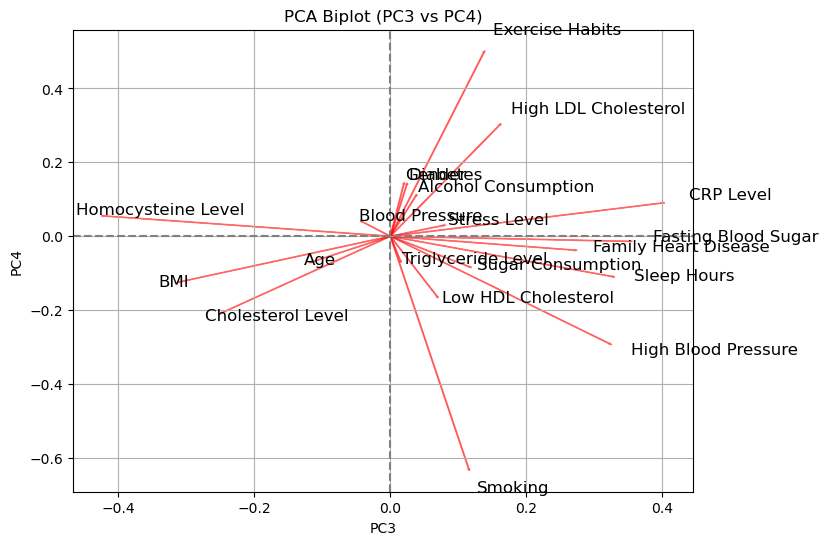

In [20]:
# Function to plot a biplot for two components
def pca_biplot(pcx, pcy, pcx_num, pcy_num):
    plt.figure(figsize=(8,6))
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(0, color='gray', linestyle='--')

    # Plot feature vectors
    for i, feature in enumerate(X.columns):
        plt.arrow(0, 0, pcx[i], pcy[i], color='r', alpha=0.5)
        plt.text(pcx[i]*1.1, pcy[i]*1.1, feature, fontsize=12)

    plt.xlabel(f'PC{pcx_num}')
    plt.ylabel(f'PC{pcy_num}')
    plt.title(f'PCA Biplot (PC{pcx_num} vs PC{pcy_num})')
    plt.grid()
    plt.show()

loadings_np = loadings.to_numpy()

# Visualizing the first four components
pc_pairs = [(0,1), (0,2), (1,2), (2,3)]

for x, y in pc_pairs:
    pca_biplot(loadings_np[:, x], loadings_np[:, y], x+1, y+1)

In [21]:
# Printing the proportion of the variance explained for each component.
pve = pca.explained_variance_ / sum(pca.explained_variance_)
print("Proportion of Variance Explained:")
for i, var in enumerate(pve):
    print(f"PC{i+1}: {var:.4f} ({var*100:.2f}%)")

Proportion of Variance Explained:
PC1: 0.0600 (6.00%)
PC2: 0.0592 (5.92%)
PC3: 0.0583 (5.83%)
PC4: 0.0576 (5.76%)
PC5: 0.0574 (5.74%)
PC6: 0.0567 (5.67%)
PC7: 0.0567 (5.67%)
PC8: 0.0557 (5.57%)
PC9: 0.0554 (5.54%)
PC10: 0.0550 (5.50%)
PC11: 0.0546 (5.46%)
PC12: 0.0544 (5.44%)
PC13: 0.0538 (5.38%)
PC14: 0.0537 (5.37%)
PC15: 0.0535 (5.35%)
PC16: 0.0533 (5.33%)
PC17: 0.0527 (5.27%)
PC18: 0.0520 (5.20%)


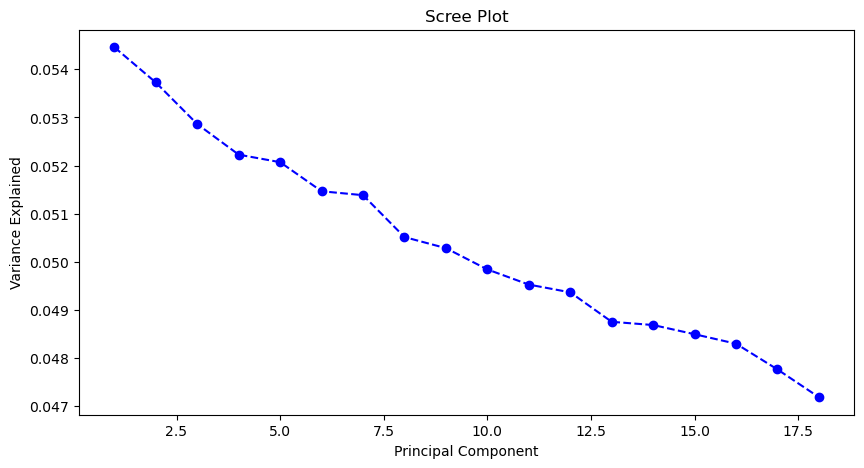

In [22]:
# Scree Plot Visualization
plt.figure(figsize=(10,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--', color='b')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

We have found that we can reduce the amount of determining factors from 20 to 18 while maintaining 90% of the variance.  This means that dimension reduction is not crucial to understanding the dataset.  We can also see that there is multicollinearity in the dataset and a strong correlation between some of the variables. 

## Supervised Learning with a Random Forest Model

First, we want to again show the significant skew that the data has.

In [23]:
print(df['Heart Disease Status'].value_counts())

0    7597
1    1903
Name: Heart Disease Status, dtype: int64


In [25]:
X = df.drop(columns=['Heart Disease Status'])
y = df['Heart Disease Status'] 

# Splitting up data to test and train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

# Resampling data to correct for skew in raw data
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Above, you can see that we used SMOTE which artificially resamples the data to look less skewed. This was done because our random forest models were only predicting a value of no which makes sense becuase just predicting no can already give an accuracy of 80%. This, while technically statistically accurate, would not be a good model which is why we have artificially resampled. Code for the use of SMOTE was found at the following link:<br>
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

In [26]:
# Creating basic rf model
rf_model = RandomForestClassifier(random_state=123,class_weight='balanced')

rf_model.fit(X_train_resampled, y_train_resampled)

y_pred = rf_model.predict(X_test)

# Getting accuracy results
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
pd.crosstab(y_pred, y_test)

Accuracy: 0.7330526315789474


Heart Disease Status,0,1
row_0,,
0,1695,397
1,237,46


This first random forest used no custom parameters and was simply a test to see how accurate such a model could be. The accuracy of the model was about 73.3%. In order to find hyperparameters that would make this model better, we opted to use a grid search cross validation to find the optimal number of estimators as well as the optimal max depth of the random forest.

In [27]:
parameters = {'n_estimators': [100, 300, 500],
              'max_depth': [10, 20, 30]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=123,class_weight='balanced'), parameters, cv = 5)

# Perform the grid search
grid_search.fit(X_train_resampled, y_train_resampled)

# Output the best parameters from the grid search
print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 30, 'n_estimators': 500}


In [28]:
rf_model2 = RandomForestClassifier(n_estimators=500, max_depth = 30, random_state=123,class_weight='balanced')

# Train the model
rf_model2.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = rf_model2.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
pd.crosstab(y_pred, y_test)

Accuracy: 0.7368


Heart Disease Status,0,1
row_0,,
0,1702,395
1,230,48


With the hyperparameters in place, this new random forest model yielded an accuracy of 73.7% This score is slightly higher than the model which had just the default parameters. 

## Supervised Learning with an Artificial Neural Net

In [29]:
#Scaling the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

Again, we have used the resampled data because there was no change in accuracy over any epochs when using just the regular data. This indicated that maybe this model was experiencing the same problem as the random forest model with regards to the skew of the the heart disease variable.

In [30]:
tf.random.set_seed(123)

# Creating model using 2 hidden layers
nn_model = Sequential([
    Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

# Compiling with adam optimizer and using a binary loss function
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting data
nn_data = nn_model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Getting statistics from model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10


C:\Users\phikr\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


355/355 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6707 - loss: 0.6069 - val_accuracy: 0.6838 - val_loss: 0.6351
Epoch 2/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7316 - loss: 0.5421 - val_accuracy: 0.6893 - val_loss: 0.6345
Epoch 3/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7463 - loss: 0.5288 - val_accuracy: 0.6939 - val_loss: 0.6363
Epoch 4/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7526 - loss: 0.5187 - val_accuracy: 0.6947 - val_loss: 0.6398
Epoch 5/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7578 - loss: 0.5094 - val_accuracy: 0.6901 - val_loss: 0.6426
Epoch 6/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7621 - loss: 0.5007 - val_accuracy: 0.6876 - val_loss: 0.6450
Epoch 7/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7708 - loss: 0.4919 - val_accuracy: 0.6884 - val_loss: 0.6452
Epoch 8/10
355/355 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7767 - loss: 0.4834 - val_accuracy: 0.6880 - val_

For our neural net, we decided to use two hidden layers, both with a rectified linear unit activation function. We compiled the model using an adam optimizer and a binary cross entropy loss function. In fitting the data, we used 10 epochs and batch sizes of 32. The final test accuracy of this model was 68.7%.

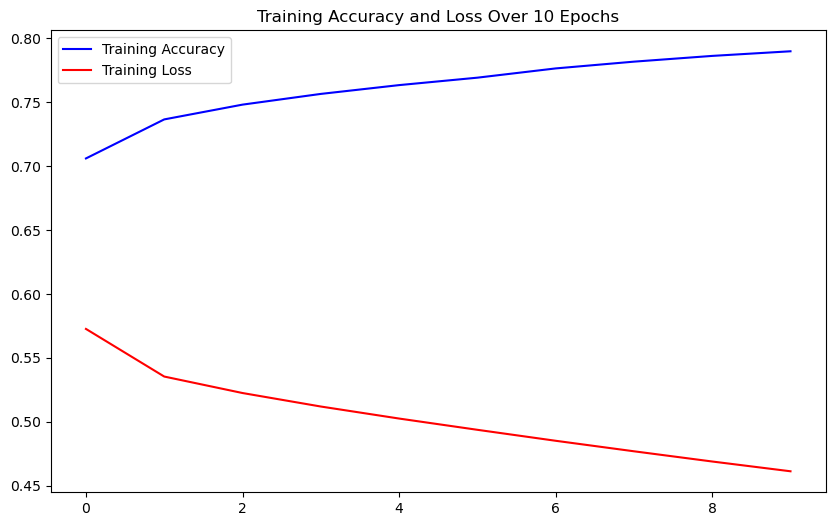

In [31]:
# Plotting accuracy and loss
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(nn_data.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(nn_data.history['loss'], label='Training Loss', color='red')

ax1.set_title('Training Accuracy and Loss Over 10 Epochs')
ax1.legend()

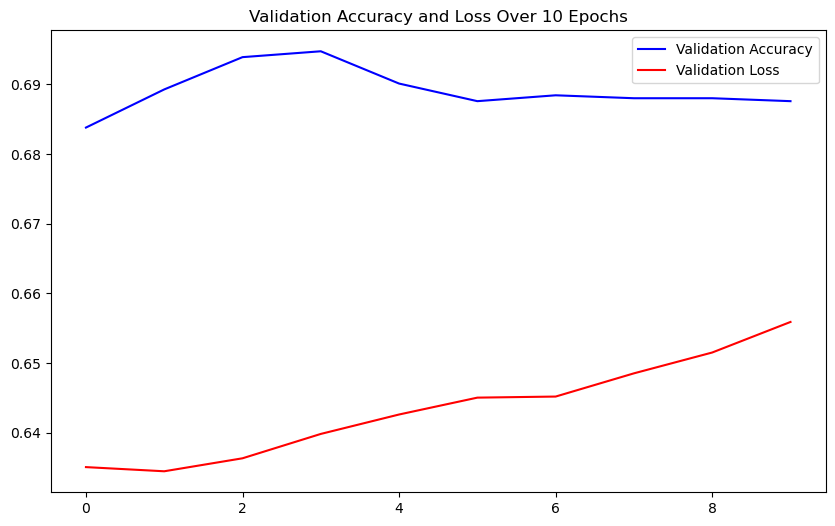

In [32]:
# Plotting validation accuracy and loss
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(nn_data.history['val_accuracy'], label='Validation Accuracy', color='blue')
ax1.plot(nn_data.history['val_loss'], label='Validation Loss', color='red')

ax1.set_title('Validation Accuracy and Loss Over 10 Epochs')
ax1.legend()

Here, we plotted the training and testing accuracies and losses to help visualize what the neural net was doing. The training values are what is to be expected, with the accuracy increasing and the loss decreasing. This, however was not the case for the test data (which is more important). Loss increased with each epoch while accuracy held fairly even. We hypothesize that this is due to the fact that our data is not complex enough to best utilize such a model. 

## Conclusion

<br>
In this project, we set out to use both supervised and unsupervised methods to understand our data and to be able to predict the occurance of heart disease. Using PCA analysis, we were able to see that dimension reduction was not a necessary step in understanding and using our data. Between the two supervised learning methods that we used, the random forest model was the better predictor of heart disease, as it yielded a 73.7% accuracy. 